<a href="https://colab.research.google.com/github/stbalaji/AIForBusiness/blob/main/AICH_M4_GenAI_BuildingAQnABot_Reddit_Source_ChatbotBuild.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# https://www.youtube.com/watch?v=EE1Y2enHrcU&t=557s

import pandas as pd
import datetime as dt

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from transformers import pipeline   # From Hugging Face

## PReprocessing of the Post Data
Like Concert Time in UTC

In [5]:
post_df=pd.read_csv("DS_ML_AI_posts.csv")
# comments_cd = pd.read_csv("DS_ML_AI_comments.csv")

In [7]:
post_df['created_date'] = post_df['created_utc'].apply(lambda x: dt.datetime.fromtimestamp(x))
post_df['created_year'] = post_df['created_date'].dt.year
post_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,8130,193,0.99,2020-05-10 13:19:54,2020
1,kuc6tz,MachineLearning,1.610275e+09,NaN,https://v.redd.it/25nxi9ojfha61,[D] A Demo from 1993 of 32-year-old Yann LeCun...,Discussion,6081,135,0.98,2021-01-10 10:30:36,2021
2,g7nfvb,MachineLearning,1.587789e+09,NaN,https://v.redd.it/rlmmjm1q5wu41,[R] First Order Motion Model applied to animat...,Research,4832,109,0.97,2020-04-25 04:27:23,2020
3,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4769,231,0.97,2021-02-28 15:12:28,2021
4,ohxnts,MachineLearning,1.625977e+09,NaN,https://i.redd.it/34sgziebfia71.jpg,[D] This AI reveals how much time politicians ...,Discussion,4750,232,0.96,2021-07-11 04:18:59,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
2980,xm51s9,artificial,1.663957e+09,NaN,https://youtube.com/watch?v=W4A-oGlkSh4&featur...,I filmed my dance and modified it with AI. The...,My project,97,14,0.90,2022-09-23 18:18:31,2022
2981,pxgvyj,artificial,1.632866e+09,NaN,https://v.redd.it/fb76jgc3fbq71,AI Learns to Intercept Moving Target Using Sim...,My project,99,6,0.95,2021-09-28 21:52:50,2021
2982,old4p4,artificial,1.626426e+09,NaN,https://signum.ai/blog/top-30-twitter-accounts...,Top 30 Twitter accounts on AI you should follow,Discussion,95,9,0.93,2021-07-16 09:05:12,2021
2983,nd0cy2,artificial,1.621090e+09,The approximation of the game’s San Andreas to...,https://www.reddit.com/r/artificial/comments/n...,Researchers At Intel Labs Propose An Approach ...,Research,95,5,0.96,2021-05-15 14:40:36,2021


In [11]:
post_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,8130,193,0.99,2020-05-10 13:19:54,2020
1,kuc6tz,MachineLearning,1.610275e+09,NaN,https://v.redd.it/25nxi9ojfha61,[D] A Demo from 1993 of 32-year-old Yann LeCun...,Discussion,6081,135,0.98,2021-01-10 10:30:36,2021
2,g7nfvb,MachineLearning,1.587789e+09,NaN,https://v.redd.it/rlmmjm1q5wu41,[R] First Order Motion Model applied to animat...,Research,4832,109,0.97,2020-04-25 04:27:23,2020
3,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4769,231,0.97,2021-02-28 15:12:28,2021
4,ohxnts,MachineLearning,1.625977e+09,NaN,https://i.redd.it/34sgziebfia71.jpg,[D] This AI reveals how much time politicians ...,Discussion,4750,232,0.96,2021-07-11 04:18:59,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
2980,xm51s9,artificial,1.663957e+09,NaN,https://youtube.com/watch?v=W4A-oGlkSh4&featur...,I filmed my dance and modified it with AI. The...,My project,97,14,0.90,2022-09-23 18:18:31,2022
2981,pxgvyj,artificial,1.632866e+09,NaN,https://v.redd.it/fb76jgc3fbq71,AI Learns to Intercept Moving Target Using Sim...,My project,99,6,0.95,2021-09-28 21:52:50,2021
2982,old4p4,artificial,1.626426e+09,NaN,https://signum.ai/blog/top-30-twitter-accounts...,Top 30 Twitter accounts on AI you should follow,Discussion,95,9,0.93,2021-07-16 09:05:12,2021
2983,nd0cy2,artificial,1.621090e+09,The approximation of the game’s San Andreas to...,https://www.reddit.com/r/artificial/comments/n...,Researchers At Intel Labs Propose An Approach ...,Research,95,5,0.96,2021-05-15 14:40:36,2021


In [ ]:
# Merge the Post and Comments DataFrame

In [ ]:
comments_posts_df = post_df.merge(comments_cd, on='post_id', how='left')

In [ ]:
comments_posts_df = comments_posts_df[~comments_posts_df['comment'].isnull()]

In [10]:
comments_posts_df

NameError: name 'comments_posts_df' is not defined

In [9]:
!pip install lets_plot
from lets_plot import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 18.1 MB/s eta 0:00:00


In [10]:
ggplot(post_df) + geom_bar(aes(fill="subreddit", x="created_year", y ="..count.."))

## What are the Trending Topics
### Use Word Cloud

In [11]:
# Combine all the post titles
post_title_text = ' '.join([title for title in post_df['post_title'].str.lower()])

In [12]:
word_cloud = WordCloud(collocation_threshold=2, width=1000, height=500, background_color='white').generate(post_title_text)

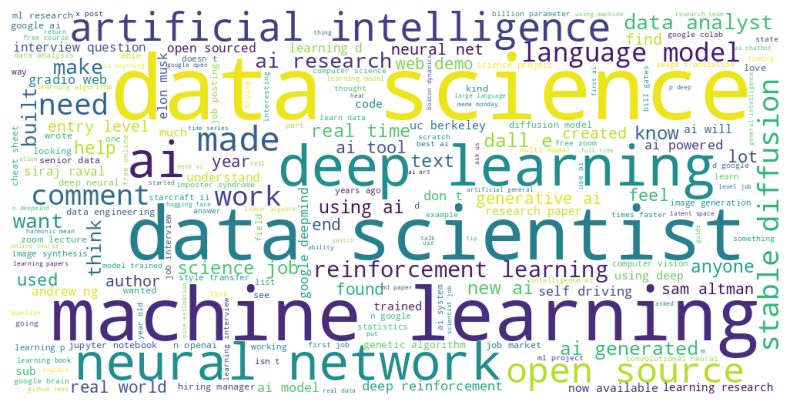

In [13]:
plt.figure(figsize=[10,5])
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# How does the Word cloud chang over year

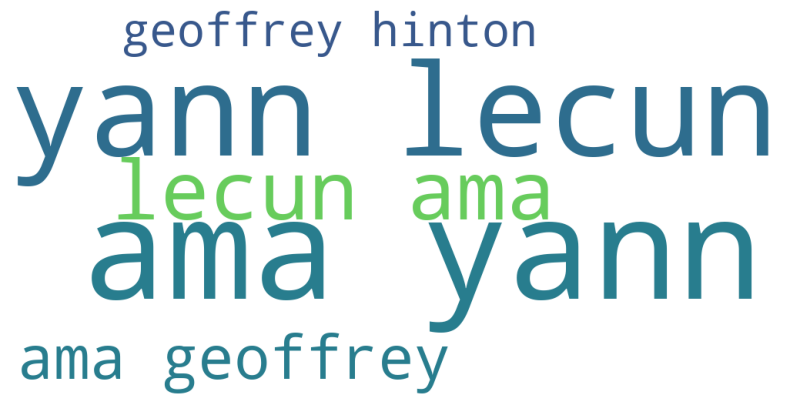

In [14]:
post_one_year_df = post_df[post_df['created_year'] == 2014]
post_title_text = ' '.join([title for title in post_one_year_df['post_title'].str.lower()])

word_cloud = WordCloud(collocation_threshold=2, width=1000, height=500, background_color='white').generate(post_title_text)

plt.figure(figsize=[10,5])
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

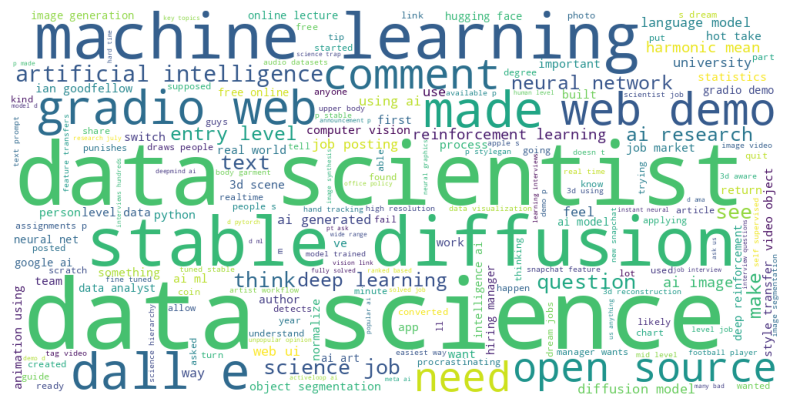

In [27]:
post_one_year_df = post_df[post_df['created_year'] == 2022]
post_title_text = ' '.join([title for title in post_one_year_df['post_title'].str.lower()])

word_cloud = WordCloud(collocation_threshold=2, width=1000, height=500, background_color='white').generate(post_title_text)

plt.figure(figsize=[10,5])
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

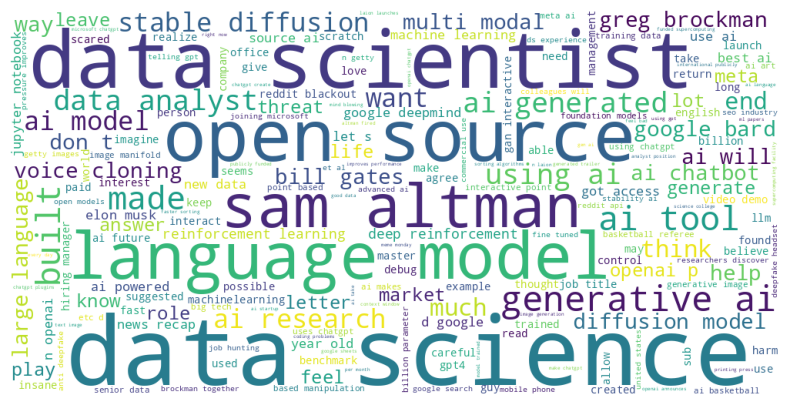

In [28]:
post_one_year_df = post_df[post_df['created_year'] == 2023]
post_title_text = ' '.join([title for title in post_one_year_df['post_title'].str.lower()])

word_cloud = WordCloud(collocation_threshold=2, width=1000, height=500, background_color='white').generate(post_title_text)

plt.figure(figsize=[10,5])
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# Sentiment Analysis

In [15]:
# Use Preexisting Sentiment Analysis Models
# Check HuggingFace : https://huggingface.co/blog/sentiment-analysis-python

# Similar to Tweet Data

sentiment_classifier_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [16]:
# sample_text = "I like you"
sample_text = "I don't love  you"
sentiment_classifier_model(sample_text)

[{'label': 'NEG', 'score': 0.9490519762039185}]

In [18]:
def fn_get_sentiment(text):
    try:
       sentiment  = sentiment_classifier_model(text)[0]['label']
    except:
       sentiment = 'Not Known'

    return;

In [35]:
comments_df = pd.read_csv("DS_ML_AI_comments.csv")

In [36]:
comments_df

,post_id,comment
0,gh1dj9,Twitter thread: [https://twitter.com/cyrildiag...
1,gh1dj9,The future 🤯
2,gh1dj9,Simple yet very useful. Thank you for sharing ...
3,gh1dj9,"Almost guaranteed, Apple will copy your idea i..."
4,gh1dj9,Ohh the nightmare of making this into a stable...
...,...,...
2110,hiv3vf,No! That’s wrong! \n\nWhat it means is that th...
2111,hiv3vf,It's demonstrably true that the number of rese...
2112,hiv3vf,No! The quality of neural net papers has been ...
2113,hiv3vf,As a proportion of total papers you can find j...


In [39]:
# comments_df_subtopic = comments_df[comments_df['post_title'].str.contains('chatgpt')]

comments_df_subtopic = comments_df[comments_df['comment'].str.contains('Twitter')]
comments_df_subtopic

,post_id,comment
0,gh1dj9,Twitter thread: [https://twitter.com/cyrildiag...
126,gh1dj9,Thanks! For now the most updated news are on m...
665,ohxnts,>Every meeting of the flemish government in Be...
702,ohxnts,To be fair their job is to lie to their consti...
783,ohxnts,￼\n\nDigital Culture\n\nArtificial Intelligenc...
904,n2f0ld,Credits: Maxhkw (Twitter)
967,n2f0ld,Don't forget to also credit Natasha Jacques (@...
1546,hiv3vf,I’m really disappointed with how Anandkumar ac...
1568,hiv3vf,At the root of these issues ... we've all noti...
1573,hiv3vf,"Yes, a million times of yes. As a junior resea..."


In [45]:
comments_df_subtopic['sentiment'] = comments_df_subtopic['comment'].astype(str).apply(lambda x: fn_get_sentiment(x))

<ipython-input-45-c2a6e42e41cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df_subtopic['sentiment'] = comments_df_subtopic['comment'].astype(str).apply(lambda x: fn_get_sentiment(x))


In [ ]:
sample_text = comments_df_subtopic.loc[1, 'comment']
sample_text
#sentiment_classifier_model(sample_text)

In [58]:
comments_df_subtopic

,post_id,comment,sentiment
0,gh1dj9,Twitter thread: [https://twitter.com/cyrildiag...,None
126,gh1dj9,Thanks! For now the most updated news are on m...,None
665,ohxnts,>Every meeting of the flemish government in Be...,None
702,ohxnts,To be fair their job is to lie to their consti...,None
783,ohxnts,￼\n\nDigital Culture\n\nArtificial Intelligenc...,None
904,n2f0ld,Credits: Maxhkw (Twitter),None
967,n2f0ld,Don't forget to also credit Natasha Jacques (@...,None
1546,hiv3vf,I’m really disappointed with how Anandkumar ac...,None
1568,hiv3vf,At the root of these issues ... we've all noti...,None
1573,hiv3vf,"Yes, a million times of yes. As a junior resea...",None


from matplotlib import pyplot as plt
import seaborn as sns
comments_df_subtopic.groupby('post_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:
!pip install kaleido
!pip install cohere
!pip install tiktoken
!pip install spacy==3.6.0
!pip install tensorflow-probability<4.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.0 MB/s eta 0:00:00
  Attempting uninstall: importlib_metadata
    Found existing installation: importlib-metadata 7.0.1
    Uninstalling importlib-metadata-7.0.1:
      Successfully uninstalled importlib-metadata-7.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled s

In [32]:
!pip install llama-index
# !pip install llama-index==0.9.12

In [42]:
!pip install typing-extensions --upgrade

In [43]:
# from llama_index import SimpleDirectoryReader
# from llama_index.readers.web import SimpleWebPageReader
# from llama_index.llms import openai

from llama_index.readers import SimpleWebPageReader
from IPython.display import Markdown, display
import os

ImportError: cannot import name 'Iterator' from 'typing_extensions' (/usr/local/lib/python3.10/dist-packages/typing_extensions.py)

https://stackoverflow.com/questions/77739005/langchain-openai-importerror-cannot-import-name-iterator-from-typing-extensi

In [38]:
from collections.abc import Iterator


In [39]:
!pip install pip-tools
!pip-compile requirements.in --verbose

Usage: pip-compile [OPTIONS] [SRC_FILES]...
Try 'pip-compile -h' for help.

Error: Invalid value for '[SRC_FILES]...': Path 'requirements.in' does not exist.
